<a href="https://colab.research.google.com/github/Trinadh-1506/Mushroom-Classification/blob/main/Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# load dataset
df = pd.read_csv('/content/mushrooms.csv')
df.head

<bound method NDFrame.head of      class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

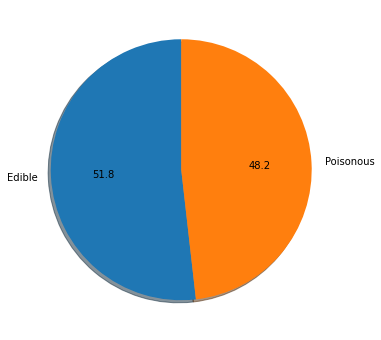

In [3]:
plt.figure(figsize = (6,6))
plt.pie(df['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = True)
plt.show()

In [4]:
#Set dependent and independent variable
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
#Check if there is null value
df.notnull().all()

class                       True
cap-shape                   True
cap-surface                 True
cap-color                   True
bruises                     True
odor                        True
gill-attachment             True
gill-spacing                True
gill-size                   True
gill-color                  True
stalk-shape                 True
stalk-root                  True
stalk-surface-above-ring    True
stalk-surface-below-ring    True
stalk-color-above-ring      True
stalk-color-below-ring      True
veil-type                   True
veil-color                  True
ring-number                 True
ring-type                   True
spore-print-color           True
population                  True
habitat                     True
dtype: bool

In [5]:
#Encode Independent Variable
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
X = df.iloc[:, 1:].apply(le.fit_transform).values
 #Encode Dependent Variable
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
y = np.array(le.fit_transform(y))
y.reshape(len(y), 1)
 #Train Test Split
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 #Feature Scaling using standrad scaling
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
 
accuracies = dict()

Logistic Regression Accuracy is: 0.955076923076923


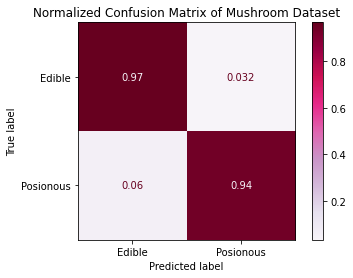

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

#Make Prediction
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

#confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

Kernel SVM Accuracy is: 1.0


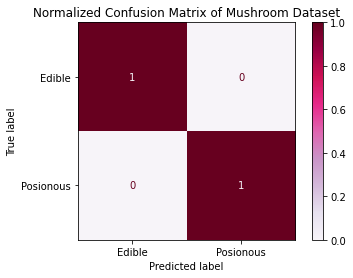

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Kernel SVM'] = accuracy_score(y_test, y_pred)
print('Kernel SVM Accuracy is: ' + str(accuracy_score(y_test, y_pred)))
#CONFUSION MATRIX
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Posionous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

Naive Bayes Accuracy is: 0.9218461538461539


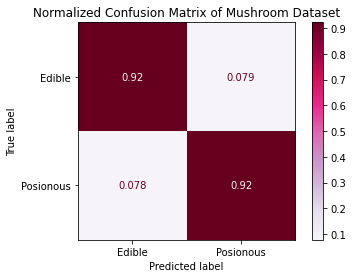

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)
print('Naive Bayes Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

#CONFUSION MATRIX
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Posionous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

K-Nearest Neighbors Accuracy is: 1.0


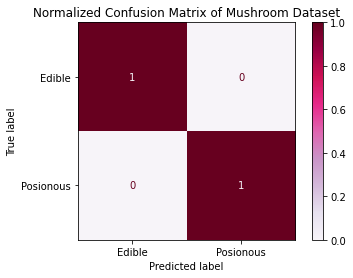

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['K-Nearest Neighbors'] = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbors Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

#CONFUSION MATRIX
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Posionous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

In [ ]:
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

,Model Name,Accuracy Score
0,Logistic Regression,0.955077
1,Kernel SVM,1.000000
2,Naive Bayes,0.921846
3,K-Nearest Neighbors,1.000000


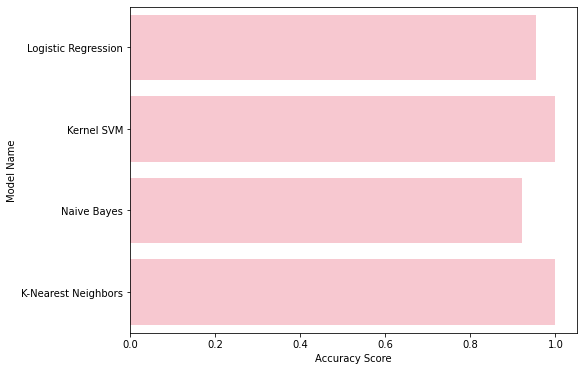

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes("pastel")
sns.barplot(y="Model Name", x="Accuracy Score", data = accuracy_df, color="pink")
plt.show()